# Figure 2

Here we'll generate figure 2.
It contains a scree plot on the percentage of variance explained by each PC, a scatter plot of PC1 and PC2 with the whole sample, including projected faces on top of them, as well as smaller scatter plots for PC1 and PC2 for each of the 3 populations found with fineStructure. Finally, it contains a

In [1]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import os
from matplotlib import cm
from matplotlib import gridspec #Use gridspec!!
from Faces import *
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

Reading databases

In [2]:
#Folders
thispath      = os.getcwd()
projpath      = os.path.realpath("../..")
pathlandmarks = os.path.join(projpath, "Results", "Landmarks")
pathfacepca   = os.path.join(projpath, "DataBases", "FacePCA")
pathres       = os.path.join(projpath, "Results")
pathfig       = os.path.join(projpath, "Results", "Figures")

In [3]:
#Databases
os.chdir(pathfacepca)
facets = pd.read_csv("facets.csv", header = None)
eigenvals = pd.read_csv("eigenvalues.csv", header = None)
os.chdir(pathres)
dat = pd.read_csv("tot_samples.csv")
os.chdir(pathlandmarks)
pc_landmark = np.matrix(pd.read_csv("PC_landmarks.csv", header = None))

In [12]:
#Define some functions
def scatter_gm(x, y, group, ax, ticks = 1, xlim = [-0.1, 0.1], ylim = [-0.1, 0.1], means = 0):
    '''
    Generate geometric morphometrics like scatter plot, with axes going through the origin using different colors for groups.
    This function generates an ax object, make sure to have your figure (fig) object already called
    Usage
        Input:
            - x: values to be plotted in the x coordinates
            - y: values to be plotted in the y coordinates
            - group: grouping variable to be maped on the scatter plot
            - ax: ax from matplotlib
            - ticks: whether to maintain the default ticks (0), or use one from -0.1 to 0.1 (1)
            - xlim: the limits of x axis
            - ylim: the limits of y axis
            - means: whether mean values of the group variable are to be highlighted (0/1)
        Output:
            - ax: ax matplotlib object
    '''
    #Importing required libraries
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    color = group.map(color_map)
    if means == 0:
        al = 0.5
    elif means == 1:
        al = 0.2
        mean_male = [x[group=="Male"].mean(), y[group=="Male"].mean()]
        mean_female = [x[group=="Female"].mean(), y[group=="Female"].mean()]

    ax.scatter(x, y, alpha = al, c=color )
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim) 
    
    if means == 1:
        ax.scatter(mean_female[0], mean_female[1], c = color_map['Female'], s=100, edgecolors='black' )
        ax.scatter(mean_male[0], mean_male[1], c = color_map['Male'], s=100, edgecolors='black' )
    
    if ticks == 1:
        plt.xticks([-0.1, -0.05, 0.05, 0.1])
        plt.yticks([-0.1, -0.05, 0.05, 0.1])
    elif ticks == 0:
        plt.xticks([])
        plt.yticks([])
        
def paste_screenshot(face, ax, pos = (0,0)):
    img   = face.take_screenshot()
    image = OffsetImage(img, zoom=0.05)
    ab = AnnotationBbox(image, pos, xycoords='data', frameon=False)
    ax.add_artist(ab)

Plot figure

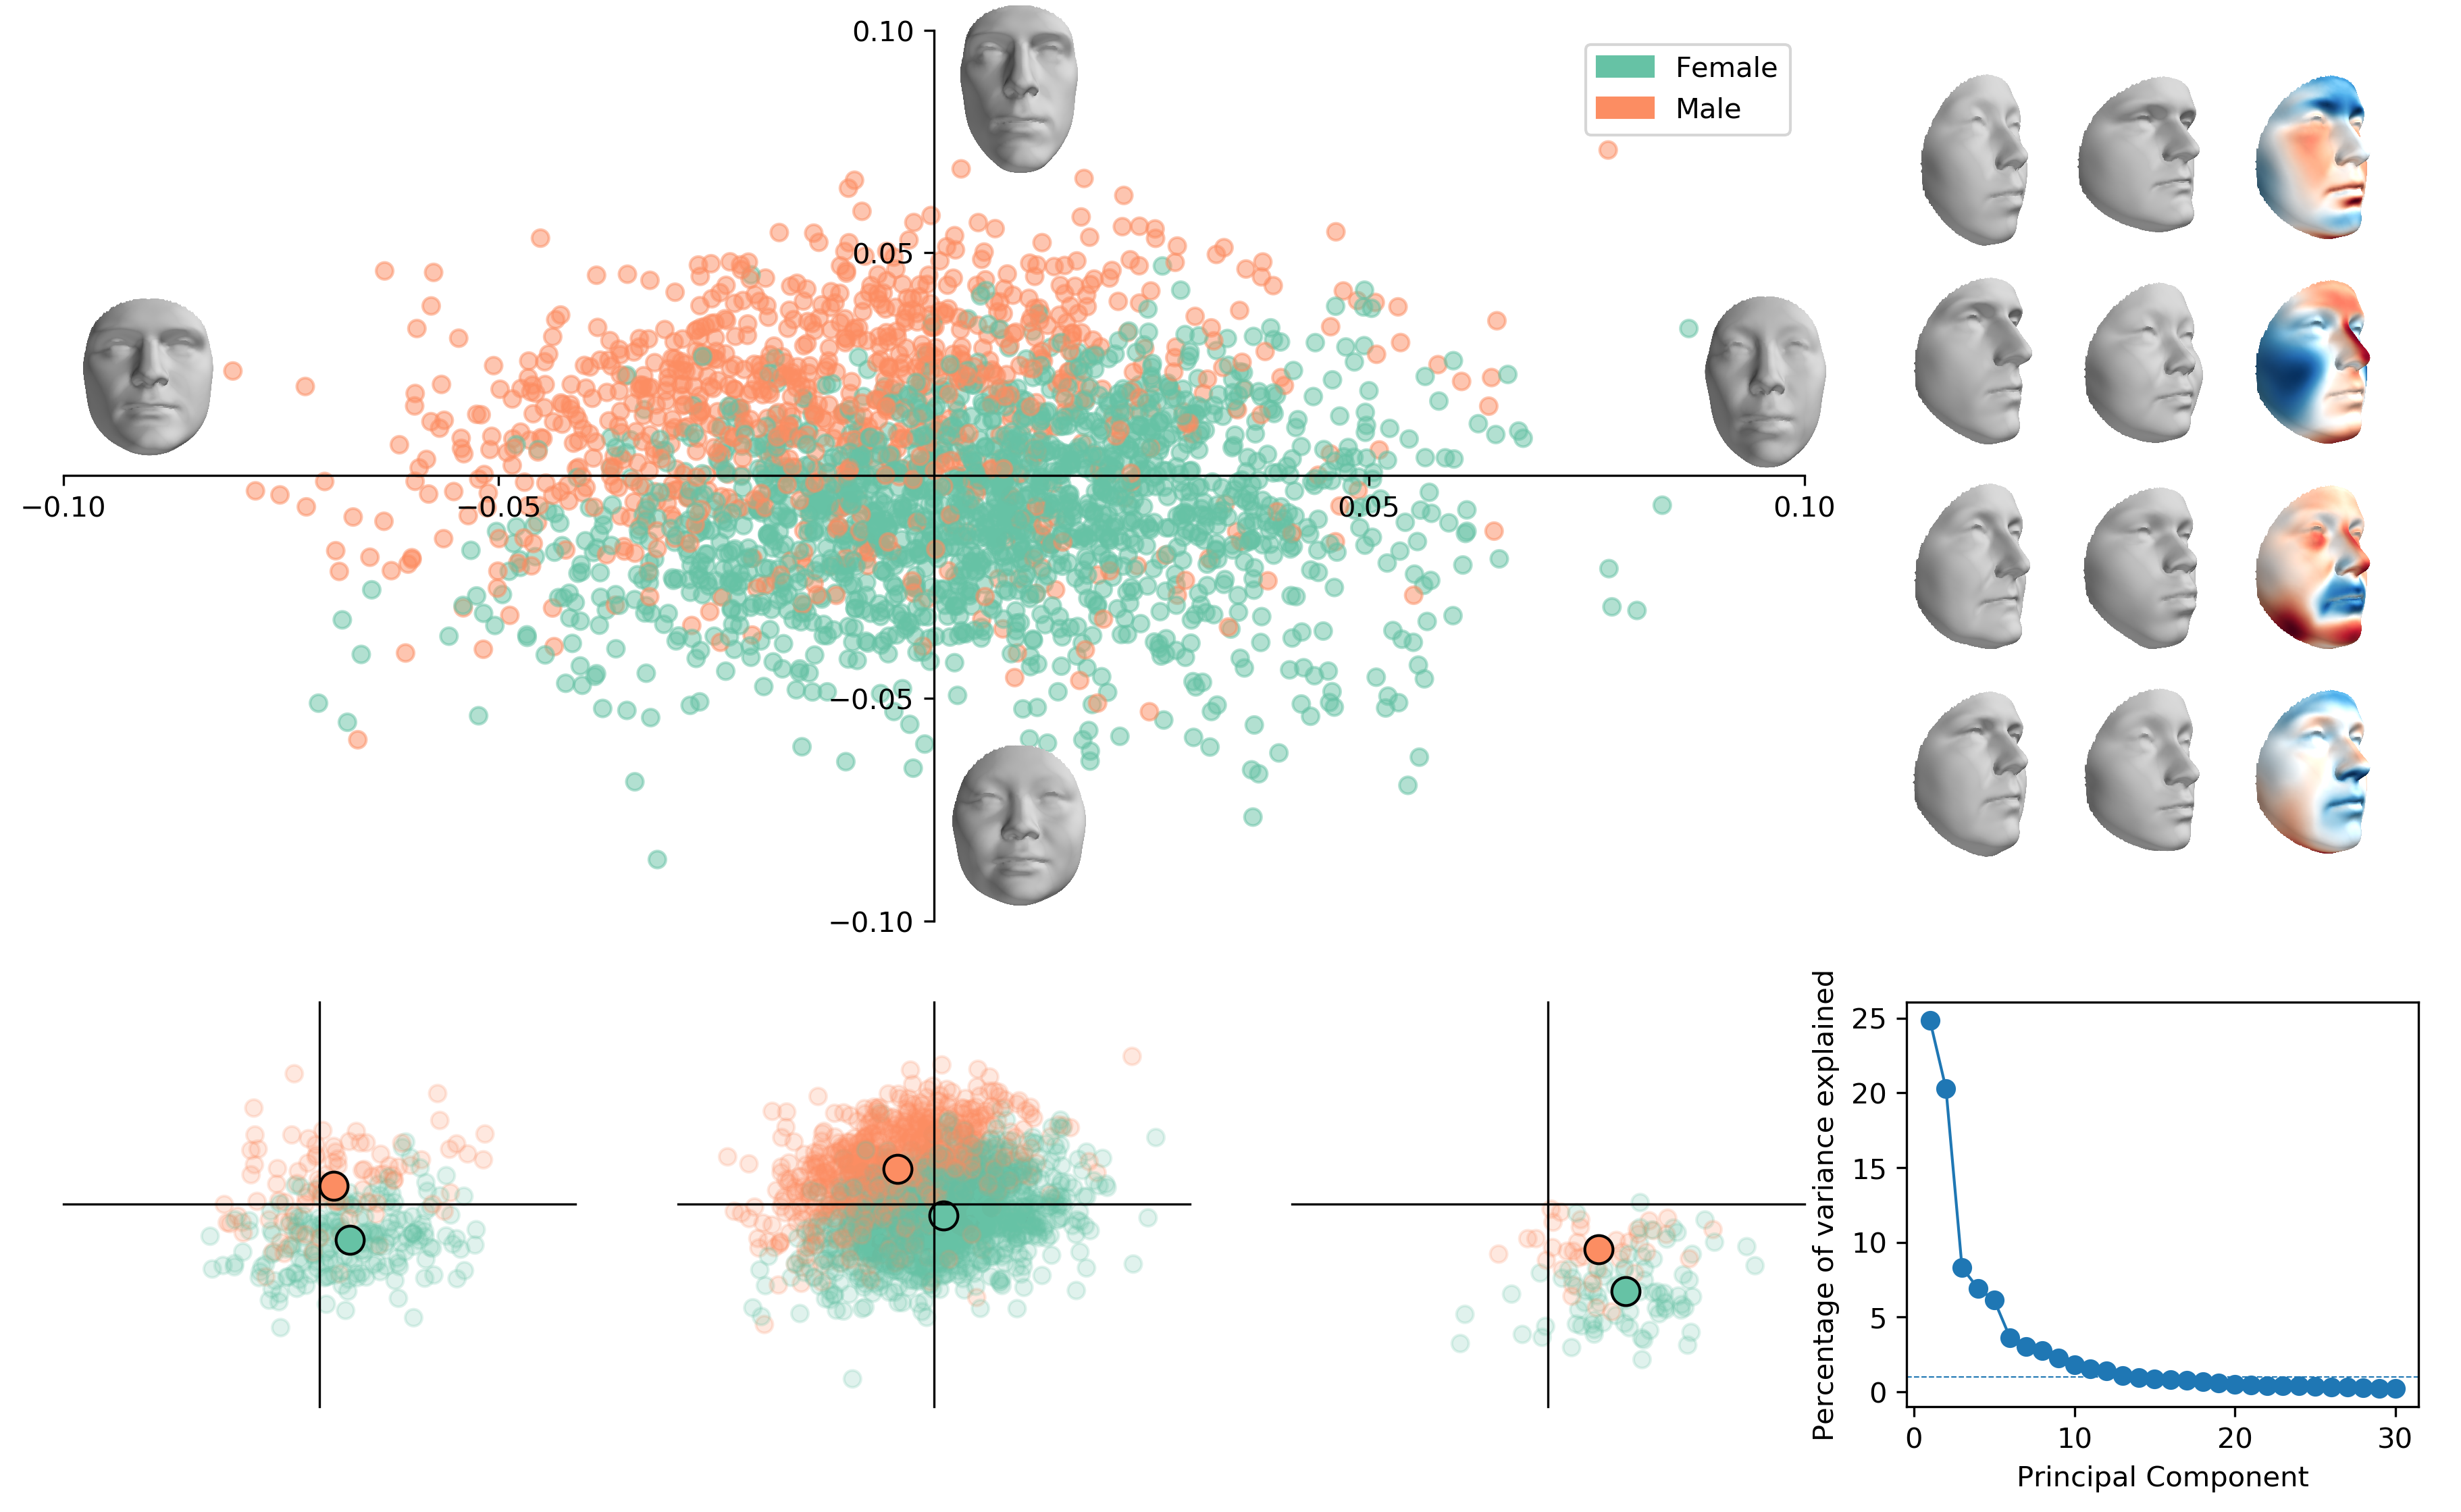

In [15]:
ngroups = dat['cluster_final'].max()

color_labels = dat['Sex'].unique()
rgb_values   = sns.color_palette('Set2', 2)
color_map    = dict(zip(color_labels, rgb_values))

fig = plt.figure(figsize=(15, 9), dpi=300)
gs  = gridspec.GridSpec(3, 4)
ax  = fig.add_subplot(gs[0:2,0:3])
scatter_gm(dat['PC1'], dat['PC2'], dat['Sex'], ax)

face1 = FaceShape(pc_landmark[0,:], facets)
face2 = FaceShape(pc_landmark[1,:], facets)
face3 = FaceShape(pc_landmark[2,:], facets)
face4 = FaceShape(pc_landmark[3,:], facets)

paste_screenshot(face1, ax, (0.0957, 0.02) )
paste_screenshot(face2, ax, (-0.09, 0.02) )
paste_screenshot(face3, ax, (0.01, 0.085) )
paste_screenshot(face4, ax, (0.01, -0.08) )

#Setting the legend
female_patch = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map["Female"], label='Female')
male_patch   = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map["Male"], label='Male')

plt.legend(handles=[female_patch, male_patch])

#Ploting small plots
for i in range(ngroups):
    newPC1 = dat[dat['cluster_final'] == i+1]['PC1'].reset_index(drop=True)
    newPC2 = dat[dat['cluster_final'] == i+1]['PC2'].reset_index(drop=True)
    newSex = dat[dat['cluster_final'] == i+1]['Sex'].reset_index(drop=True)
    ax     = fig.add_subplot(gs[2,i])
    scatter_gm(newPC1, newPC2, newSex, ax, ticks=0, means=1) 

#Plot scree plot
nPCs = 30
ax   = fig.add_subplot(gs[2,3])
sig_vals = np.arange(nPCs) + 1
ax.plot(sig_vals, eigenvals[1][0:nPCs], 'o-', linewidth=1)
ax.axhline(1, 0, nPCs, linestyle = "--", linewidth=0.5)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Percentage of variance explained')

#Plot set of faces
#Plot PC effects
nrow = 4
ncol = 3
ax  = fig.add_subplot(gs[0:2,3])
ax.set_xlim(0, 0.6)
plt.axis('off')

crow = 0.85
for i in range(0, nrow*2, 2):
    index = 0
    face1 = FaceShape(pc_landmark[i], facets)
    face2 = FaceShape(pc_landmark[i+1], facets)
    img1 = face1.take_screenshot(profile=1)
    img2 = face2.take_screenshot(profile=1)
    dist  = face1.get_normal_displacement(face2)
    avg   = (face1.landmarks + face2.landmarks) / 2
    avgface = FaceShape(avg, facets)
    img3 = avgface.take_screenshot(colormap=dist, profile=1, colortype='RdBu')
    
    image1 = OffsetImage(img1, zoom=0.05)
    image2 = OffsetImage(img2, zoom=0.05)
    image3 = OffsetImage(img3, zoom=0.05)
    
    a1 = AnnotationBbox(image1, (0.1, crow), xycoords='data', frameon=False)
    a2 = AnnotationBbox(image2, (0.3, crow), xycoords='data', frameon=False)
    a3 = AnnotationBbox(image3, (0.5, crow), xycoords='data', frameon=False)
    
    ax.add_artist(a1)
    ax.add_artist(a2)
    ax.add_artist(a3)
    
    crow = crow - 0.23

os.chdir(pathfig)
plt.savefig("Figure2.png")
plt.show()